In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Loan_default.csv')

In [ ]:
## Data Cleaning and Pre-processing

In [7]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
columns_to_drop = ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 
                   'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

cleaned_loan_data = df.drop(columns=columns_to_drop)

In [13]:
missing_values = cleaned_loan_data.isnull().sum()

In [15]:
cleaned_loan_data.head(), missing_values

(   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
 0   56   85994       50587          520              80               4   
 1   69   50432      124440          458              15               1   
 2   46   84208      129188          451              26               3   
 3   32   31713       44799          743               0               3   
 4   60   20437        9139          633               8               4   
 
    InterestRate  LoanTerm  DTIRatio  Default  
 0         15.23        36      0.44        0  
 1          4.81        60      0.68        0  
 2         21.17        24      0.31        1  
 3          7.07        24      0.23        0  
 4          6.51        48      0.73        0  ,
 Age               0
 Income            0
 LoanAmount        0
 CreditScore       0
 MonthsEmployed    0
 NumCreditLines    0
 InterestRate      0
 LoanTerm          0
 DTIRatio          0
 Default           0
 dtype: int64)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


In [17]:
## Data Understanding and Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Set up the plot style
sns.set(style="whitegrid")

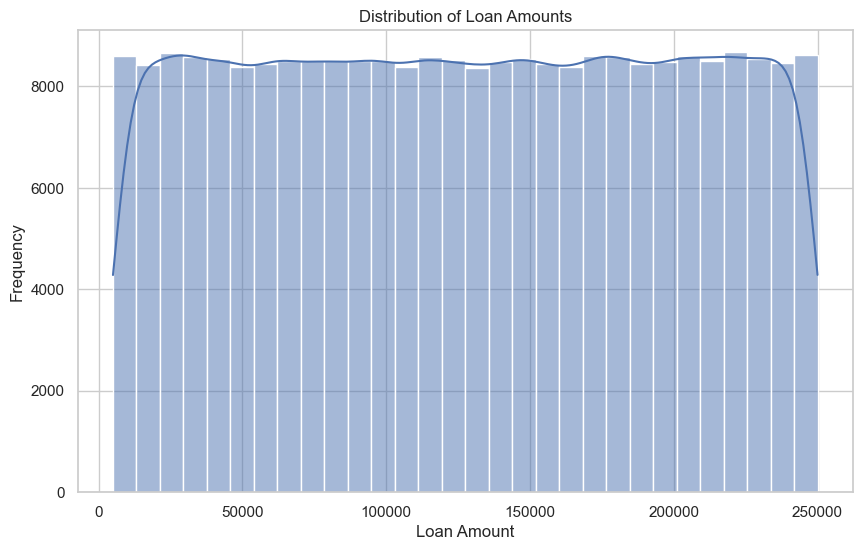

In [23]:
# Plot 1: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_loan_data['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

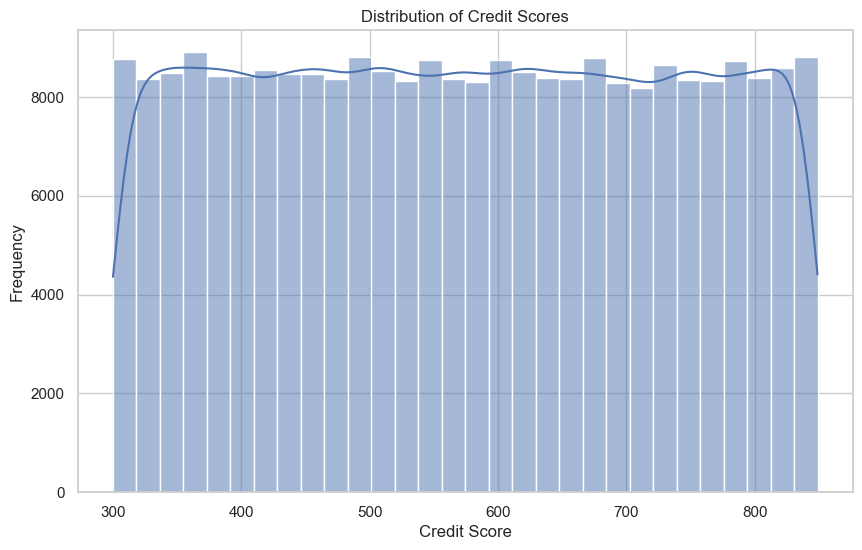

In [25]:
# Plot 2: Distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_loan_data['CreditScore'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

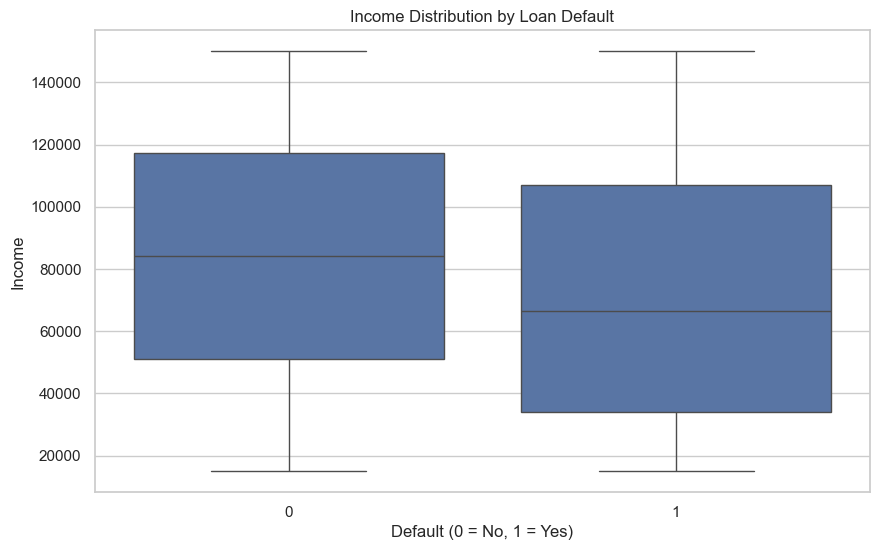

In [27]:
# Plot 3: Relationship between Income and Default
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Income', data=cleaned_loan_data)
plt.title('Income Distribution by Loan Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

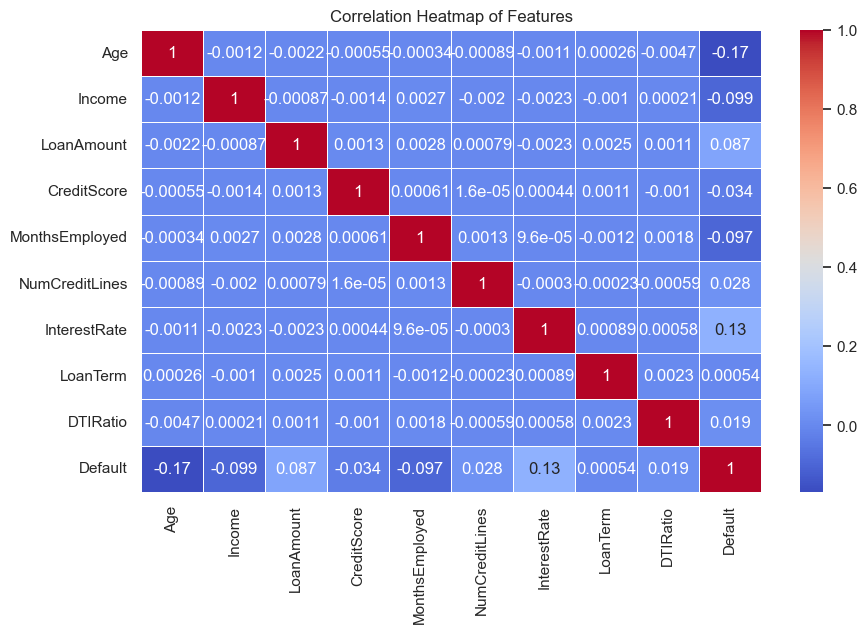

In [29]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = cleaned_loan_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
## Logistic Regression Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [33]:
# Step 1: Split the data into features (X) and target (y)
X = cleaned_loan_data.drop('Default', axis=1)
y = cleaned_loan_data['Default']

In [35]:
# Step 2: Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Step 4: Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [43]:
# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

In [45]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [52]:
# Display evaluation results
accuracy, precision, recall, conf_matrix

(0.8848834932445663,
 0.5538461538461539,
 0.01830508474576271,
 array([[45083,    87],
        [ 5792,   108]]))

In [54]:
# Display the evaluation results
class_report

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     45170\n           1       0.55      0.02      0.04      5900\n\n    accuracy                           0.88     51070\n   macro avg       0.72      0.51      0.49     51070\nweighted avg       0.85      0.88      0.83     51070\n'

In [ ]:
## Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
# Step 1: Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# Step 2: Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)


In [62]:
# Step 3: Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)


In [66]:
# Display the evaluation results
accuracy_tree, precision_tree, recall_tree, conf_matrix_tree

(0.8046015273154494,
 0.2028267521492059,
 0.2359322033898305,
 array([[39699,  5471],
        [ 4508,  1392]]))

In [68]:
class_report_tree

'              precision    recall  f1-score   support\n\n           0       0.90      0.88      0.89     45170\n           1       0.20      0.24      0.22      5900\n\n    accuracy                           0.80     51070\n   macro avg       0.55      0.56      0.55     51070\nweighted avg       0.82      0.80      0.81     51070\n'

In [ ]:
## Visualize Models

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay


<Figure size 800x600 with 0 Axes>

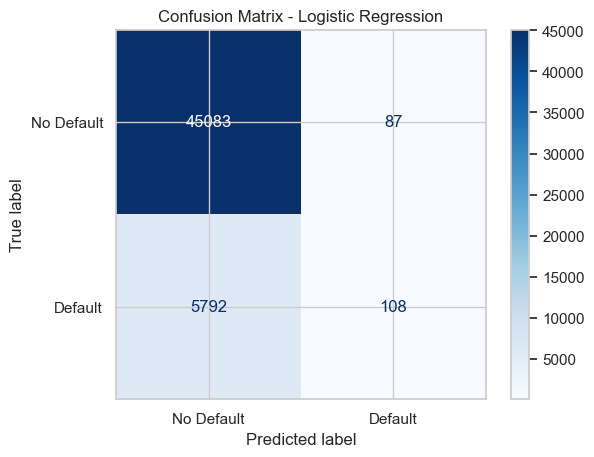

In [72]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Default", "Default"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

<Figure size 800x600 with 0 Axes>

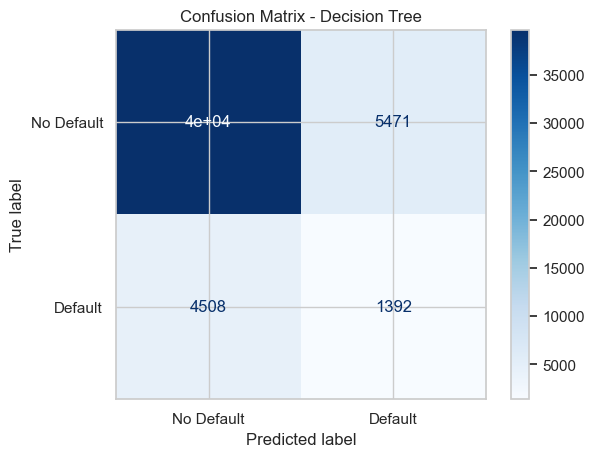

In [74]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=["No Default", "Default"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

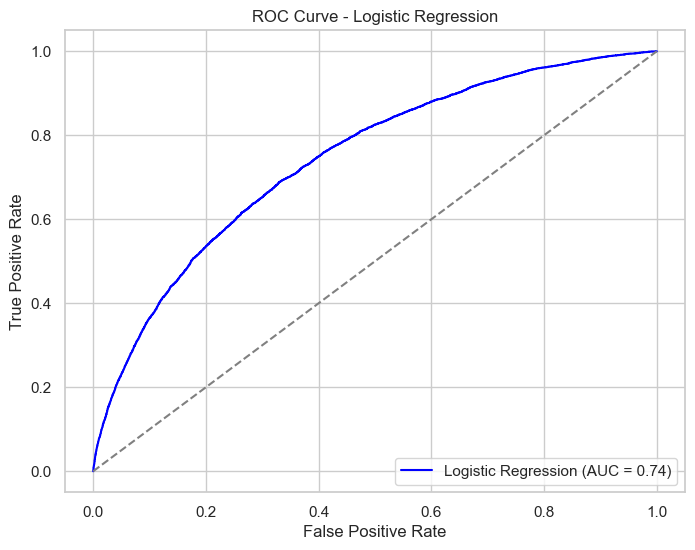

In [76]:
# ROC Curve for Logistic Regression
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

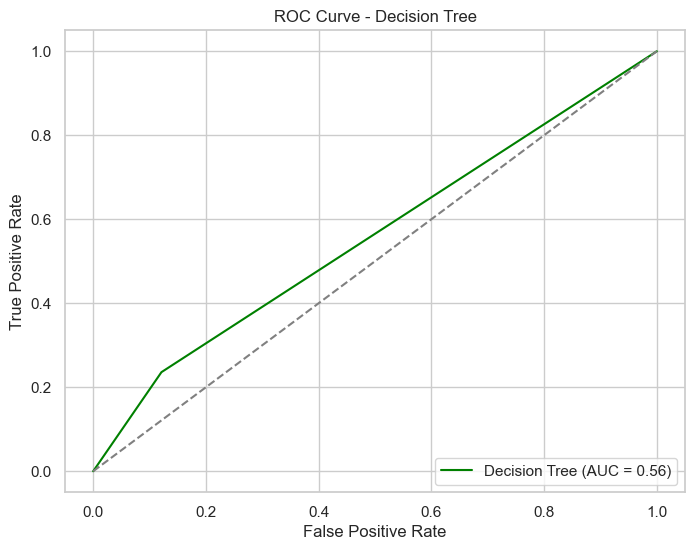

In [78]:
# ROC Curve for Decision Tree
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

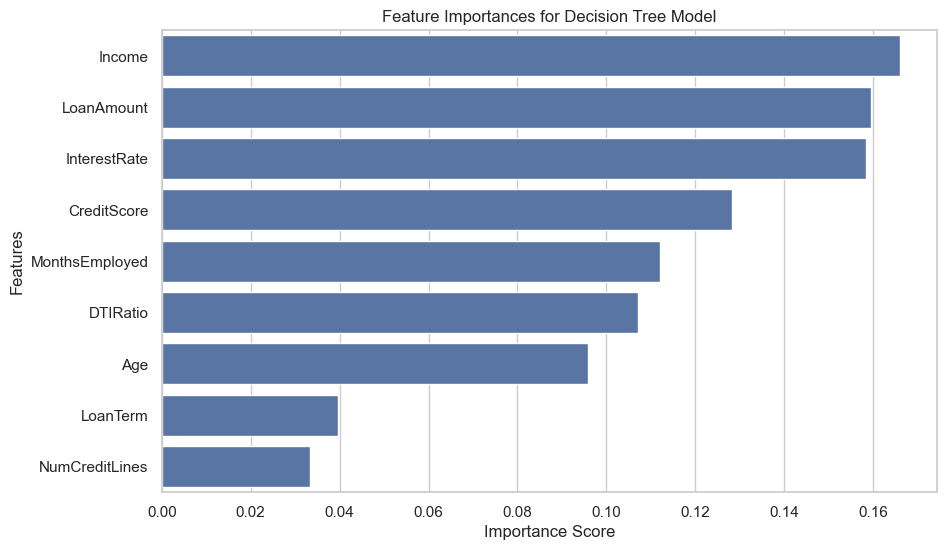

In [88]:
# extract feature importances from the Decision Tree model
feature_importances = tree_model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances for Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [84]:
import numpy as np

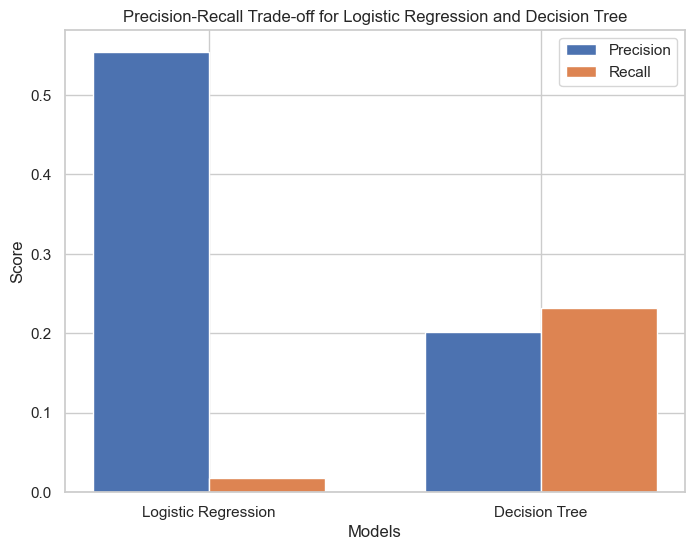

In [86]:
# precision and recall values for both models
precision_values = [0.5538461538461539, 0.20126340531805495]
recall_values = [0.01830508474576271, 0.23220338983050848]

# create the bar chart
models = ['Logistic Regression', 'Decision Tree']
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(index, precision_values, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall')

# labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Precision-Recall Trade-off for Logistic Regression and Decision Tree')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()
